In [2]:
import matplotlib
matplotlib.use('Agg')
from datascience import *
import pandas as pd
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

EDA emissions data by sector (line plot over time over all emissions (aggregated)
1. What stands out? Is there one sector that is more significant than the others?

EDA emissions data by subsector of the most significant sector
1. What subsector(s) are contributing the most to the emissions of that specific sector?

https://inferentialthinking.com/chapters/01/what-is-data-science.html

http://data8.org/sp20/python-reference.html

In [3]:
ghg_emissions = requests.get("https://api.climatetrace.org/emissions_by_subsector_timeseries?interval=year&since=2010&to=2020").json()
ghg_emissions = pd.json_normalize(ghg_emissions)
ghg_emissions = Table.from_df(ghg_emissions)
ghg_emissions

country_full,country,sector,subsector,start,end,emissions
Aruba,ABW,agriculture,cropland fires,2020-01-01,2021-01-01,nan
Aruba,ABW,agriculture,cropland fires,2019-01-01,2020-01-01,nan
Aruba,ABW,agriculture,cropland fires,2018-01-01,2019-01-01,nan
Aruba,ABW,agriculture,cropland fires,2017-01-01,2018-01-01,nan
Aruba,ABW,agriculture,cropland fires,2016-01-01,2017-01-01,nan
Aruba,ABW,agriculture,cropland fires,2015-01-01,2016-01-01,nan
Aruba,ABW,agriculture,cropland fires,2014-01-01,2015-01-01,nan
Aruba,ABW,agriculture,cropland fires,2013-01-01,2014-01-01,nan
Aruba,ABW,agriculture,cropland fires,2012-01-01,2013-01-01,nan
Aruba,ABW,agriculture,cropland fires,2011-01-01,2012-01-01,nan


In [4]:
sectors = np.unique(ghg_emissions.column("sector"))

array(['agriculture', 'buildings', 'extraction', 'manufacturing',
       'maritime', 'oil and gas', 'power', 'transport', 'waste'],
      dtype='<U13')

## Data Cleaning

As you may have noticed, there are `nan` values in the emissions column. For the first few rows specifically, this indicates that the dataset does not have greenhouse gas emissions data for country **Aruba**. Fill in the following code to drop all the rows that contain `nan` values in the `emissions` column

Hint: The function `np.isfinite` tests whether an element is not infinity or a `nan` value

In [5]:
#ghg_emissions = ghg_emissions.where(..., np.isfinite)
ghg_emissions = ghg_emissions.where("emissions", np.isfinite)
ghg_emissions

country_full,country,sector,subsector,start,end,emissions
Aruba,ABW,agriculture,rice cultivation,2020-01-01,2021-01-01,0
Aruba,ABW,agriculture,rice cultivation,2019-01-01,2020-01-01,0
Aruba,ABW,agriculture,rice cultivation,2018-01-01,2019-01-01,0
Aruba,ABW,agriculture,rice cultivation,2017-01-01,2018-01-01,0
Aruba,ABW,agriculture,rice cultivation,2016-01-01,2017-01-01,0
Aruba,ABW,agriculture,rice cultivation,2015-01-01,2016-01-01,0
Aruba,ABW,buildings,cooking,2020-01-01,2021-01-01,13300
Aruba,ABW,buildings,cooking,2019-01-01,2020-01-01,13300
Aruba,ABW,buildings,cooking,2018-01-01,2019-01-01,13300
Aruba,ABW,buildings,cooking,2017-01-01,2018-01-01,13700


*Action* Add year column

In [6]:
#create Year column
dates = ghg_emissions.column("start")
years = [int(date[:4]) for date in dates]
ghg_emissions = ghg_emissions.with_column("year", years)
ghg_emissions

country_full,country,sector,subsector,start,end,emissions,year
Aruba,ABW,agriculture,rice cultivation,2020-01-01,2021-01-01,0,2020
Aruba,ABW,agriculture,rice cultivation,2019-01-01,2020-01-01,0,2019
Aruba,ABW,agriculture,rice cultivation,2018-01-01,2019-01-01,0,2018
Aruba,ABW,agriculture,rice cultivation,2017-01-01,2018-01-01,0,2017
Aruba,ABW,agriculture,rice cultivation,2016-01-01,2017-01-01,0,2016
Aruba,ABW,agriculture,rice cultivation,2015-01-01,2016-01-01,0,2015
Aruba,ABW,buildings,cooking,2020-01-01,2021-01-01,13300,2020
Aruba,ABW,buildings,cooking,2019-01-01,2020-01-01,13300,2019
Aruba,ABW,buildings,cooking,2018-01-01,2019-01-01,13300,2018
Aruba,ABW,buildings,cooking,2017-01-01,2018-01-01,13700,2017


The following cell tells us what years this dataset covers.

In [24]:
year = np.unique(ghg_emissions.column("year"))
year

array([2015, 2016, 2017, 2018, 2019, 2020])

In the cell below, let's learn about the sectors we will be covering today.

In [30]:
sectors = np.unique(ghg_emissions.column("sector"))
sectors

array(['agriculture', 'buildings', 'extraction', 'manufacturing',
       'maritime', 'oil and gas', 'power', 'transport', 'waste'],
      dtype='<U13')

How many countries are contained in this dataset?

In [9]:
len(np.unique(ghg_emissions.column("country")))

250

# Sector

In [10]:
#sector
sectors = ghg_emissions.select(['sector', 'year', 'emissions'])
sectors

sector,year,emissions
agriculture,2020,0
agriculture,2019,0
agriculture,2018,0
agriculture,2017,0
agriculture,2016,0
agriculture,2015,0
buildings,2020,13300
buildings,2019,13300
buildings,2018,13300
buildings,2017,13700


Emissions over time

In [11]:
agg_sectors = sectors.group(["sector", "year"], sum)
agg_sectors

/Users/hansocampo/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


sector,year,emissions sum
agriculture,2015,6.31602e+09
agriculture,2016,6.35032e+09
agriculture,2017,6.40422e+09
agriculture,2018,6.35244e+09
agriculture,2019,6.43106e+09
agriculture,2020,6.41922e+09
buildings,2015,4.03479e+09
buildings,2016,4.04836e+09
buildings,2017,4.12174e+09
buildings,2018,4.22608e+09


In [12]:
agg_sectors = agg_sectors.pivot('sector', 'year', values = "emissions sum",collect=sum)
agg_sectors

year,agriculture,buildings,extraction,manufacturing,maritime,oil and gas,power,transport,waste
2015,6.31602e+09,4.03479e+09,5.15458e+07,9.36938e+09,8.10407e+08,5.54893e+09,1.34716e+10,7.1108e+09,3.16803e+09
2016,6.35032e+09,4.04836e+09,5.3314e+07,9.31098e+09,8.38055e+08,5.3857e+09,1.34767e+10,7.19147e+09,3.20247e+09
2017,6.40422e+09,4.12174e+09,5.32611e+07,9.3634e+09,8.7054e+08,5.51878e+09,1.36884e+10,7.27686e+09,3.25983e+09
2018,6.35244e+09,4.22608e+09,5.44093e+07,9.59278e+09,8.63974e+08,5.64849e+09,1.40029e+10,7.31804e+09,3.29614e+09
2019,6.43106e+09,4.22608e+09,5.50224e+07,9.70853e+09,9.53488e+08,5.69497e+09,1.39919e+10,7.33859e+09,3.29614e+09
2020,6.41922e+09,4.22608e+09,5.45942e+07,9.69734e+09,1.04236e+09,5.46634e+09,1.35643e+10,6.84983e+09,3.29614e+09


https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html

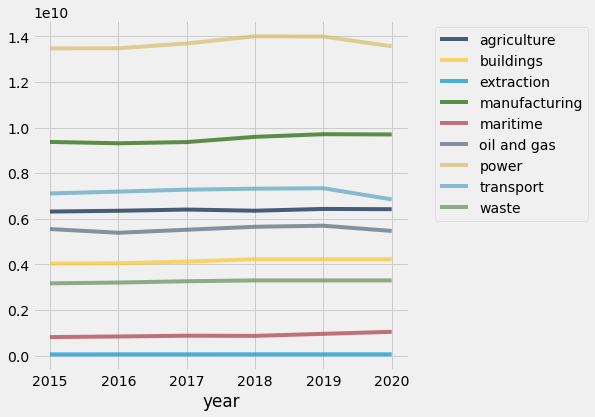

In [14]:
agg_sectors.plot("year")

In [15]:
agg_subsectors = ghg_emissions.select(['sector', 'subsector', 'year', 'emissions'])
agg_subsectors

sector,subsector,year,emissions
agriculture,rice cultivation,2020,0
agriculture,rice cultivation,2019,0
agriculture,rice cultivation,2018,0
agriculture,rice cultivation,2017,0
agriculture,rice cultivation,2016,0
agriculture,rice cultivation,2015,0
buildings,cooking,2020,13300
buildings,cooking,2019,13300
buildings,cooking,2018,13300
buildings,cooking,2017,13700


In [21]:
power = agg_subsectors.where("sector", 'power')
power

sector,subsector,year,emissions
power,electricity generation,2020,699000
power,electricity generation,2019,688000
power,electricity generation,2018,680000
power,electricity generation,2017,663000
power,electricity generation,2016,648000
power,electricity generation,2015,631000
power,other energy use,2020,0
power,other energy use,2019,0
power,other energy use,2018,0
power,other energy use,2017,0


In [22]:
power = power.group(["sector", "subsector", "year"], sum)
power = power.pivot('subsector', 'year', values = "emissions sum",collect=sum)
power

year,electricity generation,other energy use
2015,1.22531e+10,1.21853e+09
2016,1.21398e+10,1.3369e+09
2017,1.23017e+10,1.38678e+09
2018,1.2635e+10,1.36794e+09
2019,1.2624e+10,1.36794e+09
2020,1.21963e+10,1.36794e+09


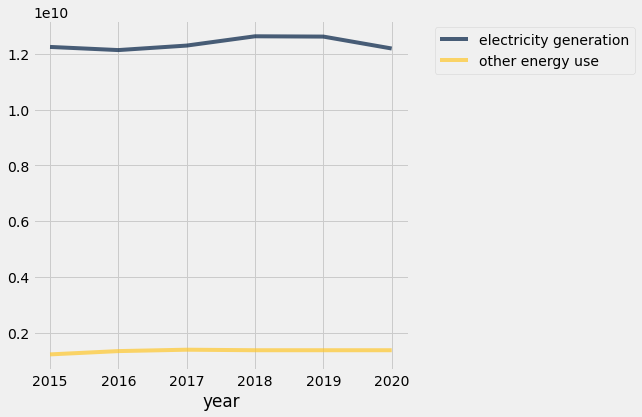

In [23]:
power.plot("year")

In [31]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def select_sector(sector):
    sector = agg_subsectors.where("sector", sector)
    sector = sector.group(["sector", "subsector", "year"], sum)
    sector = sector.pivot('subsector', 'year', values = "emissions sum",collect=sum)
    sector.plot('year')
    
sector_dropdown = widgets.Dropdown(options=sectors,
                         value="power")
interact(select_sector, sector = sector_dropdown )

interactive(children=(Dropdown(description='sector', index=6, options=('agriculture', 'buildings', 'extraction…

<function __main__.select_sector(sector)>